In [254]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
import seaborn as sns
import numpy as np
from mayavi import mlab
plt.style.use(['voresStyle.mplstyle'])
imagenr = '00000'
bluh = '000003'
n = '082'
# C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/data/brats21/processed/testing/000003
imgs = [nib.load(f"../data/brats21/BraTS2021_Training_Data/BraTS2021_{imagenr}/BraTS2021_{imagenr}_{m}.nii.gz").get_fdata().astype(np.float32)[:, :, :] for m in ["flair", "t1", "t1ce", "t2"]]
lbl = nib.load(f"../data/brats21/BraTS2021_Training_Data/BraTS2021_{imagenr}/BraTS2021_{imagenr}_seg.nii.gz").get_fdata().astype(np.uint8)[:, :, :]
# imgs = [nib.load(f"../data/brats21/processed/testing/{bluh}/BraTS2021_{imagenr}_{m}_{n}.nii.gz").get_fdata().astype(np.float32)[:, :] for m in ["flair", "t1", "t1ce", "t2"]]
# lbl = nib.load(f"../data/brats21/processed/testing/{bluh}/BraTS2021_{imagenr}_seg_{n}.nii.gz").get_fdata().astype(np.uint8)[:, :]


In [255]:

# Requires mayavi and PyQt5

def plot_3d_slices(slices, labels):
    # Create figure
    fig = mlab.figure(size=(800, 600))
    
    # Create 3D binary volume
    volume = np.zeros_like(slices)
    volume[slices != 0] = 1
    
    # Plot 3D volume
    src = mlab.pipeline.scalar_field(volume)
    vol = mlab.pipeline.volume(src, vmin=0, vmax=1)
    
    # Plot segmentation labels
    label_volume = np.zeros_like(labels)
    label_volume[labels != 0] = 1
    
    # Plot 3D volume
    src_lab = mlab.pipeline.scalar_field(label_volume)
    vol_lab = mlab.pipeline.volume(src_lab, vmin=0, vmax=1, color=(0.2, 0.7, 0.9))    
    
    # Show slice outlines
    # outline_lab = mlab.pipeline.outline(src_lab)
    # outline_lab.actor.property.color = (0, 0, 0)
    # outline_lab.actor.property.line_width = 2.0
    
    # Adjust camera position
    mlab.view(azimuth=45, elevation=45, distance='auto')

    mlab.show()

# Example usage
# Generate some random binary 2D slices
slices = imgs[2] # 10 binary slices of size 240x240
labels = lbl

# Plot 3D visualization
plot_3d_slices(slices, labels)

In [257]:
slices.shape

(240, 240, 155)

In [6]:
# Load png images
import cv2
import os
import numpy as np

im1 = cv2.imread('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/results/images/fullbrain_x.png')
# Flip image horizontally
im1 = cv2.flip(im1, 0)
im2 = cv2.imread('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/results/images/fullbrain_z.png')
# im2 = cv2.flip(im2, 0)
# im2 = cv2.flip(im2, 1)


# # Change the white to black in the images
# im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
# im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)


In [ ]:
# Create figure with matplotlib
sliceno = 80
fig, ax = plt.subplots(2, 4, figsize=(10, 5))

ax[0,3].imshow(im1, cmap='gray_r')
ax[0,3].set_title('Full brain (x-axis)')
ax[1,3].imshow(im2, cmap='gray_r')
ax[1,3].set_title('Full brain (z-axis)')
ax[0,3].set_xlim([256, 256+290])
ax[0,3].set_ylim([150, 425])
ax[1,3].set_xlim([256, 256+290])
ax[1,3].set_ylim([150, 425])

# ["flair", "t1", "t1ce", "t2"]
ax[0,1].imshow(imgs[0][ :, :, sliceno].T, cmap='gray_r')
ax[0,1].set_title('FLAIR')
ax[1,1].imshow(imgs[1][ :, :, sliceno].T, cmap='gray_r')
ax[1,1].set_title('T1')
ax[0,2].imshow(imgs[2][ :, :, sliceno].T, cmap='gray_r')
ax[0,2].set_title('T1CE')
ax[1,2].imshow(imgs[3][ :, :, sliceno].T, cmap='gray_r')
ax[1,2].set_title('T2')
ax[1,0].imshow(lbl[ :, :, sliceno].T, cmap='gray_r')
ax[1,0].set_title('Ground Truth Mask')
# Insert text into ax[1,3]
ax[0,0].text(0.5, 0.5, f'Brain Tumor \n Slice {sliceno}', horizontalalignment='center', verticalalignment='center', fontsize=20)
# Axis off for all subplots
for i in range(2):
    for j in range(4):
        # ax[i,j].set_aspect('equal')
        ax[i,j].axis('off')
plt.tight_layout()
plt.savefig('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/results/images/brain_slices.pdf')


# Investigate data distribution and class imbalance

In [10]:
# Load the data
import numpy as np
import glob
# train_paths = glob.glob('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/data/brats21/processed/training/*')
# test_paths = glob.glob('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/data/brats21/processed/testing/*')
train_paths = glob.glob('D:/HCAI/ADLCV/adlcv_anomaly/data/brats21/processed/training/*')
test_paths = glob.glob('D:/HCAI/ADLCV/adlcv_anomaly/data/brats21/processed/testing/*')

In [11]:
print(f'Number of training images: {len(train_paths)}')
print(f'Number of testing images:  {len(test_paths)}')

Number of training images: 55167
Number of testing images:  6132


In [26]:
def countSlices(paths):
    import nibabel as nib
    from tqdm import tqdm
    n_health = 0
    n_disease = 0
    for tp in (pbar:=tqdm(paths)):
        sub_paths = glob.glob(tp + '/*')
        # regex to get the path with seg in it
        seg_paths = [sp for sp in sub_paths if 'seg' in sp]
        image = nib.load(seg_paths[0]).get_fdata()
        assert image.shape == (240, 240, 155), f'Image shape is {image.shape}'
    return n_health, n_disease

In [8]:
train_health, train_disease = countSlices(train_paths)
test_health, test_disease = countSlices(test_paths)

Health: 0, Disease: 6:   0%|          | 0/55167 [00:00<?, ?it/s]

Health: 2138, Disease: 3994: 100%|██████████| 6132/6132 [01:04<00:00, 95.17it/s] 


In [27]:
import glob

path = glob.glob('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/data/brats21/BraTS2021_Training_Data/*')
countSlices(path)

100%|██████████| 1251/1251 [01:35<00:00, 13.05it/s]


(0, 0)

# Input and Output Anomalies

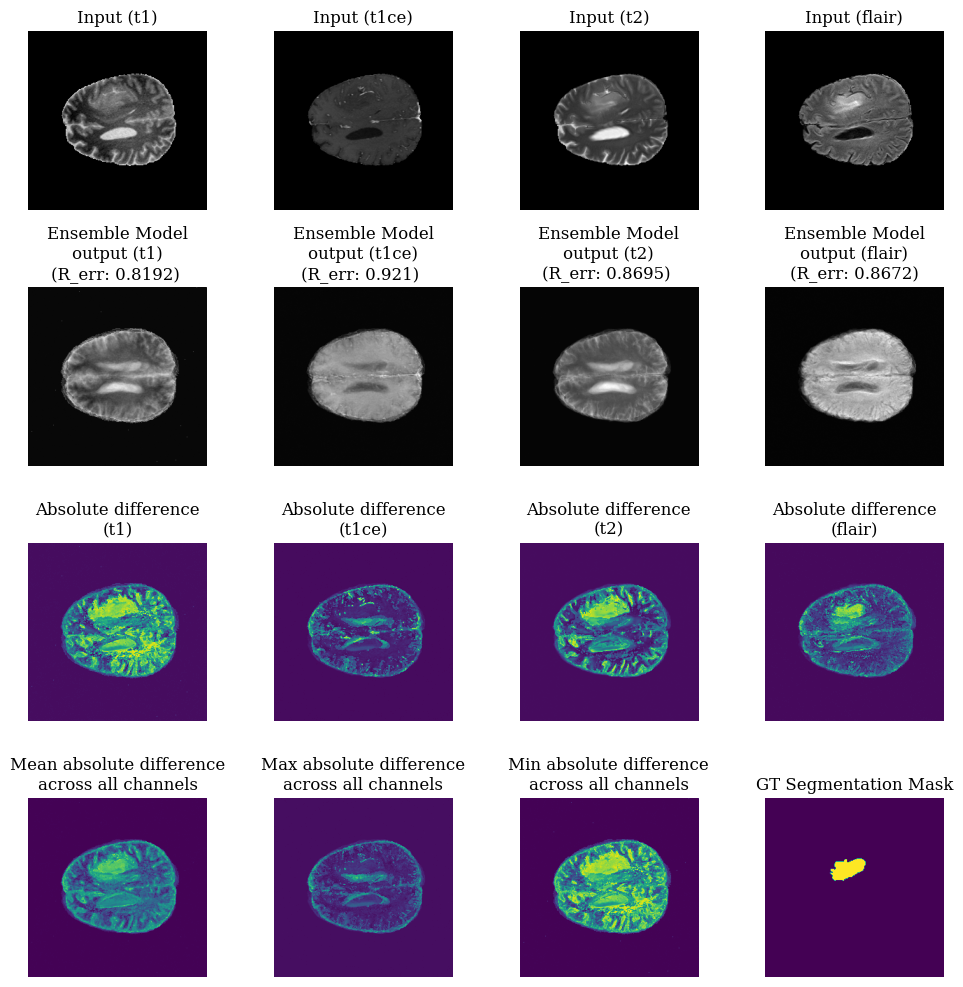

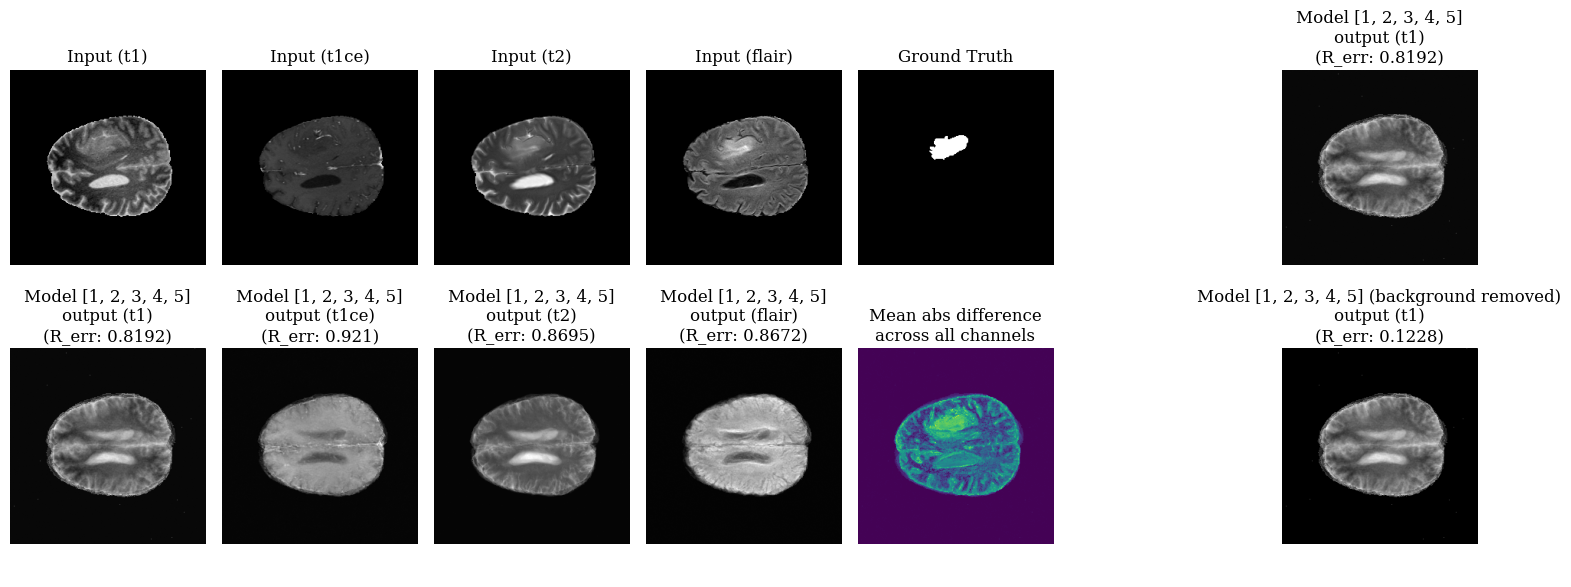

In [307]:
def old_to_new_range(old_value, new_min=0, new_max=1):
    old_min = 0
    old_max = 255
    return (old_value - old_min) * (new_max - new_min) / (old_max - old_min) + new_min

def plot_anomalies(modelnr:list = [1,2]):

    if not isinstance(modelnr, list):
        modelnr = [modelnr]
    
    channel_names = ['t1', 't1ce', 't2', 'flair']

    path = "D:/HCAI/ADLCV/adlcv_anomaly/results/ensemble_output/"
    input0 = cv2.imread(path + 'img_input_0.png',cv2.IMREAD_GRAYSCALE)
    input1 = cv2.imread(path + 'img_input_1.png',cv2.IMREAD_GRAYSCALE)
    input2 = cv2.imread(path + 'img_input_2.png',cv2.IMREAD_GRAYSCALE)
    input3 = cv2.imread(path + 'img_input_3.png',cv2.IMREAD_GRAYSCALE)
    GT = cv2.imread(path + 'ground_truth.png',cv2.IMREAD_GRAYSCALE)

    model_sample0 = np.array([cv2.imread(path + f'model_{mnr}_sampled_output0.png',cv2.IMREAD_GRAYSCALE) for mnr in modelnr])
    model_sample1 = np.array([cv2.imread(path + f'model_{mnr}_sampled_output1.png',cv2.IMREAD_GRAYSCALE) for mnr in modelnr])
    model_sample2 = np.array([cv2.imread(path + f'model_{mnr}_sampled_output2.png',cv2.IMREAD_GRAYSCALE) for mnr in modelnr])
    model_sample3 = np.array([cv2.imread(path + f'model_{mnr}_sampled_output3.png',cv2.IMREAD_GRAYSCALE) for mnr in modelnr])

    # Reverse image 0 and sample 0 to match in magnitude with the other channels
    GT = cv2.bitwise_not(GT)


    def convert(input0, model_sample0, name, subtract_background=False):
        if name == 't1':
            input0 = cv2.bitwise_not(input0)
        mask1 = input0 == 255
        if name == 'flair':
            mask2 = [model <= 30 for model in model_sample0]
        else:
            mask2 = [model <= 20 for model in model_sample0]
        temp = model_sample0.copy()
        if name == 't1':
            model_sample0 = [cv2.bitwise_not(mdl) for mdl in model_sample0]
        input0[mask1] = 0
        for i in range(len(model_sample0)):
            if subtract_background:
                model_sample0[i][mask2[i]] = 0
            else:
                model_sample0[i][mask2[i]] = temp[i][mask2[i]]
        return input0, model_sample0

    input0_zero, model_sample0_zero = convert(input0, model_sample0, name='t1', subtract_background=True)
    input0, model_sample0 = convert(input0, model_sample0, name='t1')
    # input1, model_sample1 = convert(input1, model_sample1, name='t1ce')
    # input2, model_sample2 = convert(input2, model_sample2, name='t2')
    # input3, model_sample3 = convert(input3, model_sample3, name='flair')
    


    # Absolute difference between input and output
    diff0 = old_to_new_range(np.abs(input0 - model_sample0))
    diff0_zero = old_to_new_range(np.abs(input0_zero - model_sample0_zero))
    diff1 = old_to_new_range(np.abs(input1 - model_sample1))
    diff2 = old_to_new_range(np.abs(input2 - model_sample2))
    diff3 = old_to_new_range(np.abs(input3 - model_sample3))
    
    recon_error_0 = round(np.mean(diff0), 4)
    recon_error_0_zero = round(np.mean(diff0_zero), 4)
    recon_error_1 = round(np.mean(diff1), 4)
    recon_error_2 = round(np.mean(diff2), 4)
    recon_error_3 = round(np.mean(diff3), 4)

    fig, ax = plt.subplots(4, 4, figsize=(10, 10))
    ax[0,0].imshow(input0, cmap='gray')
    ax[0,0].set_title(f'Input ({channel_names[0]})')
    ax[0,1].imshow(input1, cmap='gray')
    ax[0,1].set_title(f'Input ({channel_names[1]})')
    ax[0,2].imshow(input2, cmap='gray')
    ax[0,2].set_title(f'Input ({channel_names[2]})')
    ax[0,3].imshow(input3, cmap='gray')
    ax[0,3].set_title(f'Input ({channel_names[3]})')
    ax[1,0].imshow(np.mean(model_sample0, axis=0), cmap='gray')
    ax[1,0].set_title(f'Ensemble Model\noutput ({channel_names[0]})\n(R_err: {recon_error_0}) ')
    ax[1,1].imshow(np.mean(model_sample1, axis=0), cmap='gray')
    ax[1,1].set_title(f'Ensemble Model\noutput ({channel_names[1]})\n(R_err: {recon_error_1}) ')
    ax[1,2].imshow(np.mean(model_sample2, axis=0), cmap='gray')
    ax[1,2].set_title(f'Ensemble Model\noutput ({channel_names[2]})\n(R_err: {recon_error_2}) ')
    ax[1,3].imshow(np.mean(model_sample3, axis=0), cmap='gray')
    ax[1,3].set_title(f'Ensemble Model\noutput ({channel_names[3]})\n(R_err: {recon_error_3})')
    ax[2,0].imshow(np.mean(diff0, axis=0), cmap='viridis_r')
    ax[2,0].set_title(f'Absolute difference\n({channel_names[0]})')
    ax[2,1].imshow(np.mean(diff1, axis=0), cmap='viridis_r')
    ax[2,1].set_title(f'Absolute difference\n({channel_names[1]})')
    ax[2,2].imshow(np.mean(diff2, axis=0), cmap='viridis_r')
    ax[2,2].set_title(f'Absolute difference\n({channel_names[2]})')
    ax[2,3].imshow(np.mean(diff3, axis=0), cmap='viridis_r')
    ax[2,3].set_title(f'Absolute difference\n({channel_names[3]})')

    # Investigate the mean, max, and min of the absolute differences
    stacked_diff = np.stack([np.mean(diff0, axis=0), np.mean(diff1, axis=0), np.mean(diff2, axis=0), np.mean(diff3, axis=0)], axis=0)
    mean_diff = np.mean(stacked_diff, axis=0)
    max_diff = np.max(stacked_diff, axis=0)
    min_diff = np.min(stacked_diff, axis=0)
    sum_diff = np.sum(stacked_diff, axis=0)
    ax[3,0].imshow(mean_diff, cmap='viridis_r')
    ax[3,0].set_title('Mean absolute difference\nacross all channels')
    ax[3,1].imshow(max_diff, cmap='viridis_r')
    ax[3,1].set_title('Max absolute difference\nacross all channels')
    ax[3,2].imshow(min_diff, cmap='viridis_r')
    ax[3,2].set_title('Min absolute difference\nacross all channels')
    ax[3,3].imshow(GT, cmap='viridis_r')
    ax[3,3].set_title('GT Segmentation Mask')
    for i in range(4):
        for j in range(4):
            ax[i,j].axis('off')
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(2, 7, figsize=(15, 6))
    ax[0,0].imshow(input0, cmap='gray')
    ax[0,0].set_title(f'Input ({channel_names[0]})')
    ax[0,1].imshow(input1, cmap='gray')
    ax[0,1].set_title(f'Input ({channel_names[1]})')
    ax[0,2].imshow(input2, cmap='gray')
    ax[0,2].set_title(f'Input ({channel_names[2]})')
    ax[0,3].imshow(input3, cmap='gray')
    ax[0,3].set_title(f'Input ({channel_names[3]})')
    ax[0,4].imshow(cv2.bitwise_not(GT), cmap='gray')
    ax[0,4].set_title('Ground Truth')
    ax[1,0].imshow(np.mean(model_sample0, axis=0), cmap='gray')
    ax[1,0].set_title(f'Model {modelnr}\noutput ({channel_names[0]})\n(R_err: {recon_error_0})')
    ax[1,1].imshow(np.mean(model_sample1, axis=0), cmap='gray')
    ax[1,1].set_title(f'Model {modelnr}\noutput ({channel_names[1]})\n(R_err: {recon_error_1})')
    ax[1,2].imshow(np.mean(model_sample2, axis=0), cmap='gray')
    ax[1,2].set_title(f'Model {modelnr}\noutput ({channel_names[2]})\n(R_err: {recon_error_2})')
    ax[1,3].imshow(np.mean(model_sample3, axis=0), cmap='gray')
    ax[1,3].set_title(f'Model {modelnr}\noutput ({channel_names[3]})\n(R_err: {recon_error_3})')
    ax[1,4].imshow(mean_diff, cmap='viridis_r')
    # Overlay of ground truth on the mean absolute difference
    # GT_mask = np.ma.masked_where(GT > 0, GT)
    # ax[1,4].imshow(GT_mask, cmap='gray_r', interpolation='none', alpha=0.6)
    ax[1,4].set_title('Mean abs difference\nacross all channels')

    ax[0,6].imshow(np.mean(model_sample0, axis=0), cmap='gray')
    ax[0,6].set_title(f'Model {modelnr}\noutput ({channel_names[0]})\n(R_err: {recon_error_0})')
    ax[1,6].imshow(np.mean(model_sample0_zero, axis=0), cmap='gray')
    ax[1,6].set_title(f'Model {modelnr} (background removed)\noutput ({channel_names[0]})\n(R_err: {recon_error_0_zero})')

    for i in range(2):
        for j in range(7):
            ax[i,j].axis('off')
    plt.tight_layout()
    # D:\HCAI\ADLCV\adlcv_anomaly\results
    plt.savefig('D:/HCAI/ADLCV/adlcv_anomaly/results/images/ensemble_ZERO_model_an_detect.pdf')

    # fig, ax = plt.subplots(1,2, figsize=(10, 5))
    # ax[0].imshow(np.mean(model_sample0, axis=0), cmap='gray')
    # ax[0].set_title(f'Model {modelnr}\noutput ({channel_names[0]})\n(R_err: {recon_error_0})')
    # ax[1].imshow(np.mean(model_sample0_zero, axis=0), cmap='gray')
    # ax[1].set_title(f'Model {modelnr} (background removed)\noutput ({channel_names[0]})\n(R_err: {recon_error_0_zero})')
    # ax[0].axis('off')
    # ax[1].axis('off')

    # plt.tight_layout()
    # plt.savefig('D:/HCAI/ADLCV/adlcv_anomaly/results/images/recon_loss_diff.pdf')

# plot_anomalies([1])
plot_anomalies([1,2,3,4,5])